In [50]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [51]:
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50408806,2021-07-17,f,$150.00,$150.00,3.0,45.0
1,50408806,2021-07-18,f,$150.00,$150.00,3.0,45.0
2,50408806,2021-07-19,t,$150.00,$150.00,3.0,45.0
3,50408806,2021-07-20,t,$150.00,$150.00,3.0,45.0
4,50408806,2021-07-21,t,$150.00,$150.00,3.0,45.0


In [52]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.86,4.52,4.69,00000957568,t,6,6,0,0,0.39
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.83,4.81,00001070920,t,6,6,0,0,0.70
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.84,4.83,00000957080,t,6,6,0,0,0.91
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.35
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.25


In [53]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


In [54]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518603 entries, 0 to 3518602
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 187.9+ MB


In [55]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9640 non-null   int64  
 1   listing_url                                   9640 non-null   object 
 2   scrape_id                                     9640 non-null   int64  
 3   last_scraped                                  9640 non-null   object 
 4   name                                          9637 non-null   object 
 5   description                                   9532 non-null   object 
 6   neighborhood_overview                         6720 non-null   object 
 7   picture_url                                   9640 non-null   object 
 8   host_id                                       9640 non-null   int64  
 9   host_url                                      9640 non-null   o

In [56]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366678 entries, 0 to 366677
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     366678 non-null  int64 
 1   id             366678 non-null  int64 
 2   date           366678 non-null  object
 3   reviewer_id    366678 non-null  int64 
 4   reviewer_name  366678 non-null  object
 5   comments       366325 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.8+ MB


In [57]:
# Fill missing price with zero
calendar['price'].fillna('$0', inplace=True)
# Remove commas in price
calendar['price'] = calendar['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
calendar['price'] = calendar['price'].apply(lambda x:float(x.split('$')[1]))
calendar.head(4)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50408806,2021-07-17,f,150.0,$150.00,3.0,45.0
1,50408806,2021-07-18,f,150.0,$150.00,3.0,45.0
2,50408806,2021-07-19,t,150.0,$150.00,3.0,45.0
3,50408806,2021-07-20,t,150.0,$150.00,3.0,45.0


In [71]:
# Convert available to numeric data
calendar['available'] = calendar['available'].apply(lambda x:1 if x=='t' else 0)
# Split month into a separate column
calendar['month'] = calendar['date'].apply(lambda x: x.split('-')[1])
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
2,50408806,2021-07-19,1,1.5,$150.00,3.0,45.0,07
3,50408806,2021-07-20,1,1.5,$150.00,3.0,45.0,07
4,50408806,2021-07-21,1,1.5,$150.00,3.0,45.0,07
5,50408806,2021-07-22,1,1.5,$150.00,3.0,45.0,07
6,50408806,2021-07-23,1,1.5,$150.00,3.0,45.0,07


In [73]:
# check if the number of listings was the same every day
calendar.groupby(['listing_id']).count()['date'].unique()

array([131, 349, 356, 351, 337, 335, 363, 336, 341, 320, 197, 196, 365,
        71, 342, 289, 347, 283, 139, 350, 333, 269, 301, 258, 132, 286,
       282,  98, 229, 307, 214, 364,  43, 315, 324,  93, 288, 290, 300,
       292, 331, 355, 306, 298, 310, 345, 107, 358,  58, 323,  79,  49,
        18, 319,  91, 241, 304, 253, 166, 318, 346, 143, 340,  57,  29,
       309, 297, 362, 316, 126, 142, 348, 352, 274,  85, 246, 263,  17,
       278, 195, 281,   1, 308,  45,  65, 123, 361, 313, 312, 338, 259,
         8,  46, 153, 262,  73, 242, 243, 248, 287, 343, 145, 314, 327,
        30, 171, 167, 293, 234, 291,  33,  72, 105, 295, 114, 332,  37,
       328,  82,  42, 212,  67,  56, 353,  74, 204, 321, 322, 359, 334,
       329,  75,  47, 256, 294,  81, 165, 276,  78, 164, 299, 122, 225,
       194, 159, 119, 326, 325, 146, 311,  50, 157, 250, 228,  26, 103,
        77,  54, 330, 354, 237, 275, 102, 303, 158, 277, 215,  32, 360,
        20, 162, 296, 271,  12, 168, 280, 106,  76, 305, 257,  3

In [79]:
# Groupby by month sum
calendar_month_sum= calendar.groupby(["month"]).sum()
calendar_month_sum.drop(["listing_id"],axis=1,inplace=True)
calendar_month_sum.reset_index(inplace=True)
calendar_month_sum

,month,available,price,minimum_nights,maximum_nights
0,01,195018,211137.71,637184.0,180548274.0
1,02,167232,194228.09,686125.0,153946236.0
2,03,186902,209264.75,930859.0,172317142.0
3,04,171104,226051.93,880136.0,158239615.0
4,05,170854,261071.59,889432.0,158333159.0
5,06,166107,247842.88,864070.0,153930339.0
6,07,128243,173696.34,439274.0,116260632.0
7,08,144169,142033.54,487324.0,127294839.0
8,09,186914,170715.18,577750.0,167209568.0
9,10,211713,181776.41,634107.0,192403932.0


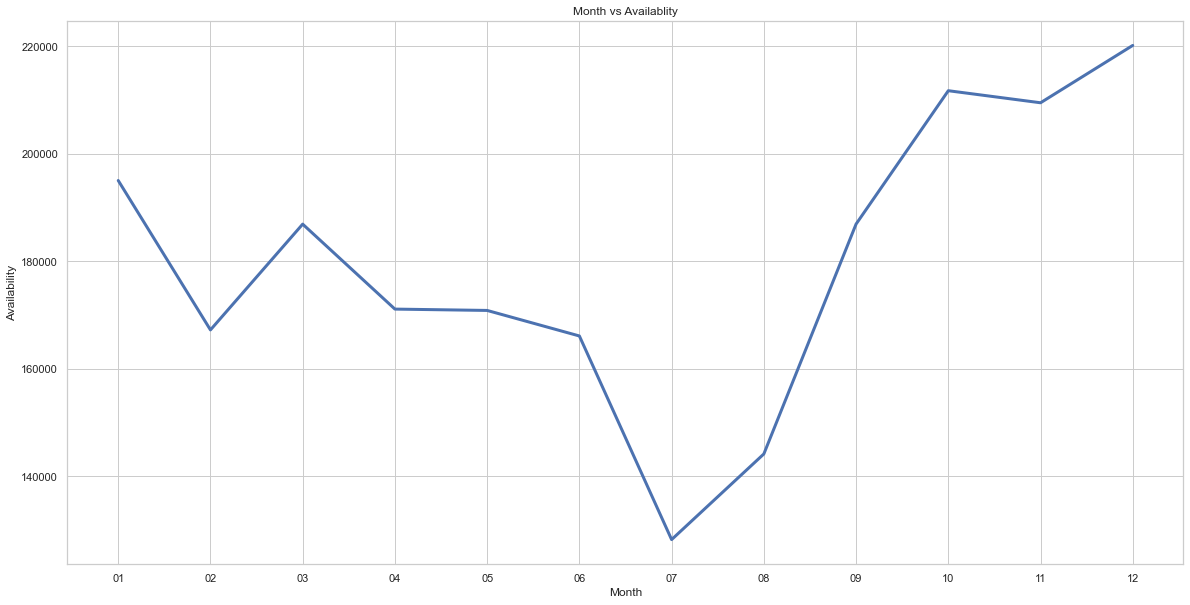

In [87]:
plt.figure(figsize=(20, 10))
x = calendar_month_sum["month"]
y = calendar_month_sum["available"]
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availablity')
plt.grid(True)
plt.show()

In [88]:
# Groupby by month average
calendar_month_sum['average price'] = calendar_month_sum['price']/calendar_month_sum['available']
calendar_month_sum

,month,available,price,minimum_nights,maximum_nights,average price
0,01,195018,211137.71,637184.0,180548274.0,1.082658
1,02,167232,194228.09,686125.0,153946236.0,1.161429
2,03,186902,209264.75,930859.0,172317142.0,1.119650
3,04,171104,226051.93,880136.0,158239615.0,1.321138
4,05,170854,261071.59,889432.0,158333159.0,1.528039
5,06,166107,247842.88,864070.0,153930339.0,1.492068
6,07,128243,173696.34,439274.0,116260632.0,1.354431
7,08,144169,142033.54,487324.0,127294839.0,0.985188
8,09,186914,170715.18,577750.0,167209568.0,0.913335
9,10,211713,181776.41,634107.0,192403932.0,0.858598


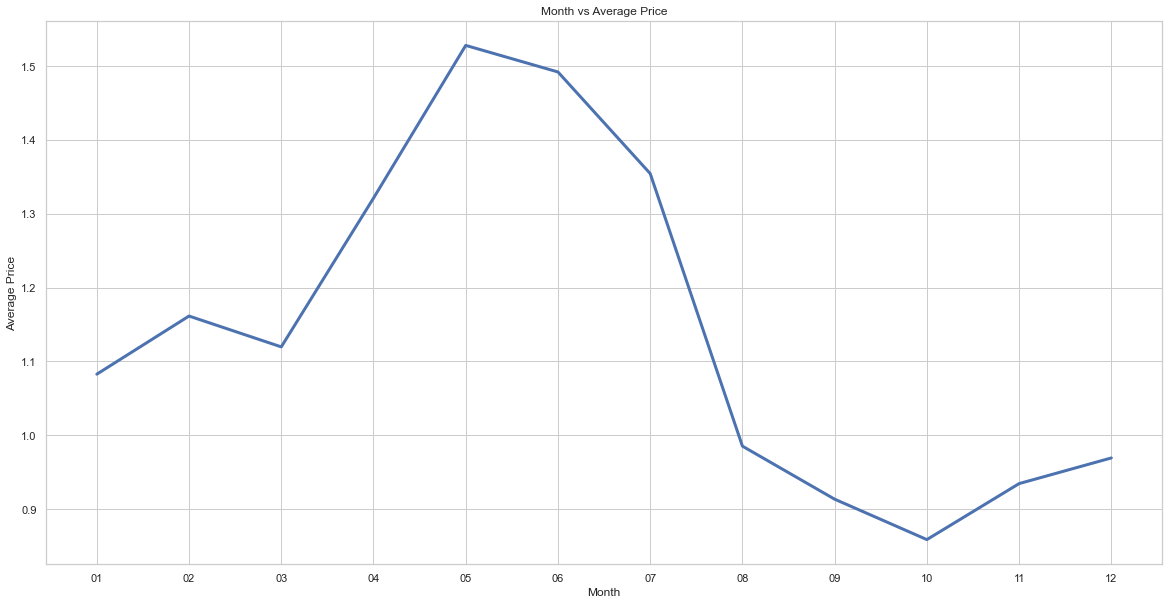

In [90]:
plt.figure(figsize=(20, 10))
x = calendar_month_sum['month']
y = calendar_month_sum['average price']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Month vs Average Price')

plt.grid(True)
plt.show()

In [58]:
listing['price']

0       $100.00
1        $59.00
2        $45.00
3        $60.00
4        $69.00
         ...   
9635     $50.00
9636     $18.00
9637     $60.00
9638    $123.00
9639    $150.00
Name: price, Length: 9640, dtype: object

In [59]:
calendar['price'] = calendar['price'].replace('[\$\,\.]', '', regex=True).astype(float)/100
calendar['price']

0          1.50
1          1.50
2          1.50
3          1.50
4          1.50
           ... 
3518598    0.78
3518599    0.78
3518600    0.78
3518601    0.78
3518602    0.78
Name: price, Length: 3518603, dtype: float64

In [60]:
calendar = calendar[calendar['available']=='t']
set(calendar['available'])

{'t'}

Text(0.5, 0, 'Booking price')

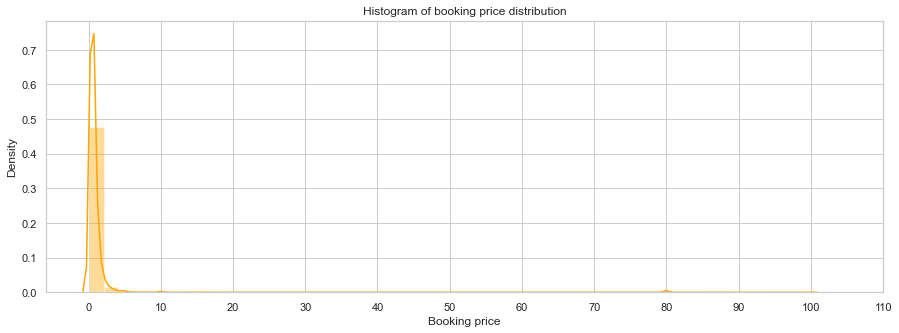

In [104]:
# Histogram of booking price distribution
plt.rcParams["figure.figsize"] = (15,5)
sns.distplot(calendar['price'] , color='orange')
x = [0,10,20,30,40,50,60,70,80,90,100,110 ]
plt.xticks(x)
plt.title('Histogram of booking price distribution')
plt.xlabel('Booking price')

In [62]:
calendar['price'].describe()

count    2.157864e+06
mean     1.124684e+00
std      5.444295e+00
min      9.000000e-02
25%      3.800000e-01
50%      5.500000e-01
75%      8.700000e-01
max      9.999000e+01
Name: price, dtype: float64

In [63]:
listing['price'] = listing['price'].replace('[\$\,\.]', '', regex=True).astype(float)/100
listing['price']

0       100.0
1        59.0
2        45.0
3        60.0
4        69.0
        ...  
9635     50.0
9636     18.0
9637     60.0
9638    123.0
9639    150.0
Name: price, Length: 9640, dtype: float64

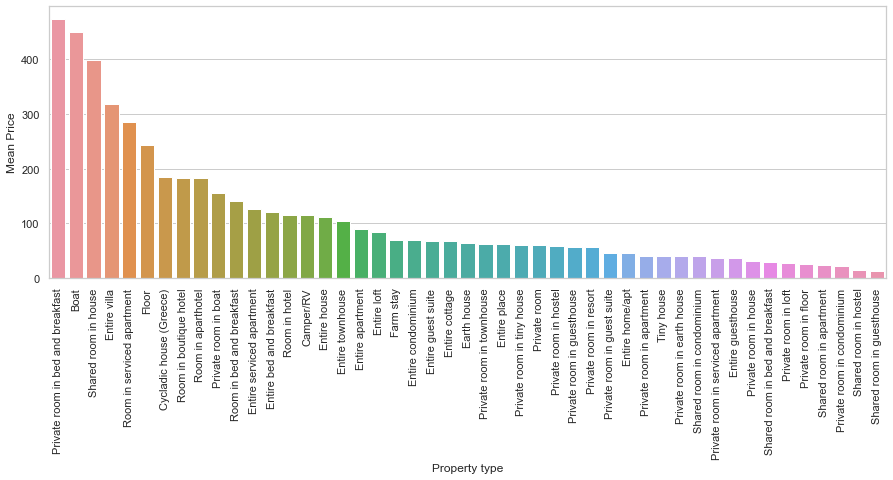

In [64]:
# mean price per Property type
x = pd.DataFrame(listing.groupby('property_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'property_type',
            y = 'price',
            data = x)
plt.xticks(rotation=90)
plt.xlabel('Property type')
plt.ylabel('Mean Price')
plt.show()

In [92]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9640 non-null   int64  
 1   listing_url                                   9640 non-null   object 
 2   scrape_id                                     9640 non-null   int64  
 3   last_scraped                                  9640 non-null   object 
 4   name                                          9637 non-null   object 
 5   description                                   9532 non-null   object 
 6   neighborhood_overview                         6720 non-null   object 
 7   picture_url                                   9640 non-null   object 
 8   host_id                                       9640 non-null   int64  
 9   host_url                                      9640 non-null   o

In [94]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.86,4.52,4.69,00000957568,t,6,6,0,0,0.39
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.83,4.81,00001070920,t,6,6,0,0,0.70
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.84,4.83,00000957080,t,6,6,0,0,0.91
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.35
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.25


In [96]:
listings_miss = pd.DataFrame((listing.isnull().sum())*100/len(listing), columns=['% Missing Values'])
listings_miss[listings_miss['% Missing Values']>0]

,% Missing Values
name,0.031120
description,1.120332
neighborhood_overview,30.290456
host_name,0.134855
host_since,0.134855
host_location,0.300830
host_about,43.547718
host_response_time,19.408714
host_response_rate,19.408714
host_acceptance_rate,21.431535


In [98]:
missing_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
# check datatype of missing cols
listing[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         7463 non-null   float64
 1   review_scores_accuracy       7423 non-null   float64
 2   review_scores_cleanliness    7423 non-null   float64
 3   review_scores_checkin        7422 non-null   float64
 4   review_scores_communication  7423 non-null   float64
 5   review_scores_location       7422 non-null   float64
 6   review_scores_value          7421 non-null   float64
 7   reviews_per_month            7463 non-null   float64
dtypes: float64(8)
memory usage: 602.6 KB


In [100]:
# fill 0 to other missing cols
for col in missing_cols:
    listing[col].fillna(0,inplace=True)
    
# print result
listing[missing_cols].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4.79,4.86,4.76,4.86,4.86,4.52,4.69,0.39
1,4.85,4.94,4.92,4.89,4.92,4.83,4.81,0.70
2,4.83,4.90,4.94,4.97,4.97,4.84,4.83,0.91
3,4.79,4.95,4.91,4.91,4.87,4.77,4.77,0.35
4,4.76,4.81,4.94,4.94,5.00,4.69,4.63,0.25


In [108]:
# convert amenities to numerical data
listing['amenities'] == listing['amenities']
listing['TV'] = 0
listing['Internet'] = 0
listing['Kitchen'] = 0
listing['Free_parking'] = 0
listing['Washer_dryer'] = 0
listing['Air Conditioning'] = 0
listing['Smoke_detector'] = 0
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,0,0,0.39,0,0,0,0,0,0,0
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,0,0,0.70,0,0,0,0,0,0,0
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,0,0,0.91,0,0,0,0,0,0,0
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,0,0,0.35,0,0,0,0,0,0,0
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,0,0,0.25,0,0,0,0,0,0,0
